In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# In models like below outliers impact much
# 1. Linear regression/ Logistic regression
# 2. Ensemble technique - Adaboost
# 3. Deep Learning algs

# COmmon patterns -> we calculate weights here

In [4]:
# In tree based algos outliers dont impact much

In [5]:
# # Treat Outliers
# 1. Trimming -> data will be lost, but its fast
# 2. Capping -> limiting the outlers and giving them the cutoff value and replace them
# 3. missing values like treatment -> nan etc
# 4. Discritization -> numerical data bracket them and treat them as same

In [6]:
## this sheet will mostl contain Trimming and capping

In [7]:
# mue +- 3sigma -> when data is close to normally distributed
#  q1 - 1.5 iqr , q3 + 1.5 iqr  -> skewed data -> box plot
# percentile based approach -> 0.5 or 2.5 and 97.5 or 99.5 percentile

In [8]:
# Techniques covered
# 1. Z - score treatement
# 2. IQR based filtering
# 3. Percentile
# 4. Winsorization

In [9]:
# Z- score -> assumpption -> the data is distributed normally, or close to normally distributed
# mean and 1 std deviation 68.2 % data lies mue +- sd
# mean and 2 std 95% data lies mue +- 2 sd
# mean and 3 std 97.5 data lies mue +- 3 sd

In [10]:
# Z- socre xi = (xi-mue) / sigma
#  Outlier treatment -> trimming and capping

In [11]:
from google.colab import files
uploaded = files.upload()

Saving placement.csv to placement.csv


In [12]:
df = pd.read_csv('placement.csv')
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-17-b2b403341058>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
<ipython-input-17-b2b403341058>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


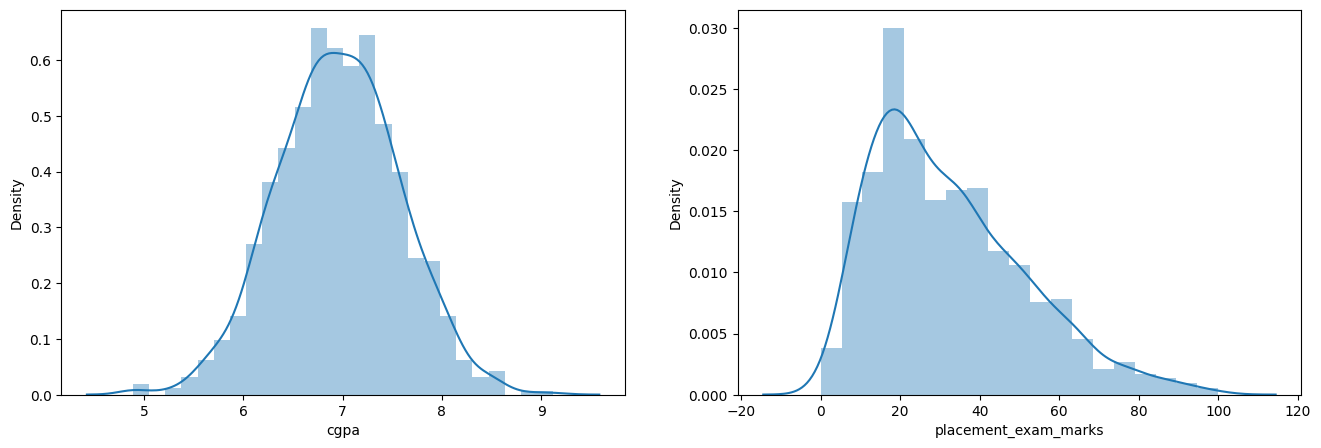

In [17]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

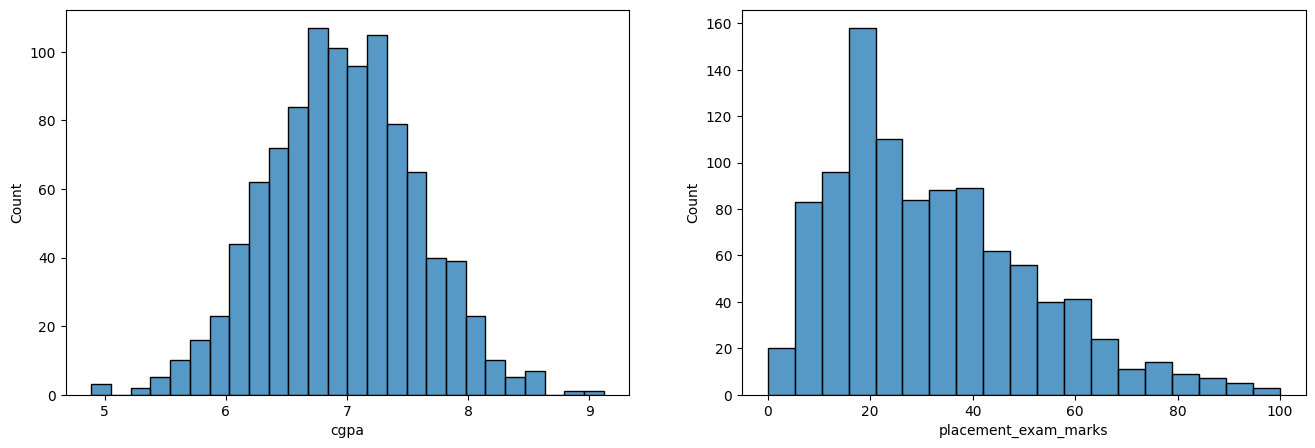

In [18]:
plt.figure(figsize = (16,5))

plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

In [ ]:
# observations -> Z score can be applied on cgpa as we can see a noral distributed pattern
# it cant be applied on placement_exam_marks column because this is skewed

In [20]:
print('mean', df['cgpa'].mean())
print("std",df['cgpa'].std())
print('min', df['cgpa'].min())
print('max', df['cgpa'].max())

mean 6.96124
std 0.6158978751323896
min 4.89
max 9.12


In [21]:
# finding boundary values
print('high tail', df['cgpa'].mean() + 3*df['cgpa'].std())
print('low tail', df['cgpa'].mean() - 3*df['cgpa'].std())

high tail 8.808933625397168
low tail 5.113546374602832


In [22]:
# finding outliers -> show me the rows that are falling at either end tails of the distribution
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11) ]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [26]:
# trimming -< wrote a condition and created the new dataset

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)] # well opposite of what we wrote abive
new_df # the above 5 columns have ben removed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [27]:
# Approach 2
# Calculating Z-score

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/ df['cgpa'].std() # creating a new column of cgpa with z scores
df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [29]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [30]:
df[df['cgpa_zscore'] < -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [31]:
df[(df['cgpa_zscore'] > 3) |(df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [32]:
# trimming

new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [33]:
# capping

In [34]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()
print('upper', upper_limit)
print('lower', lower_limit)

upper 8.808933625397168
lower 5.113546374602832


In [35]:
df['cgpa'] = np.where(df['cgpa']> upper_limit, upper_limit, np.where( df['cgpa'] < lower_limit, lower_limit, df['cgpa']))

In [37]:
#  np.where(x,y,z) x = condition, y = if condition becomes true what to do, z = if conditoon becomes false what to do

In [38]:
df # we can see that the number of rows is same and nothing is deleated

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.190000,26.0,1,0.371425
1,7.460000,38.0,1,0.809810
2,7.540000,40.0,1,0.939701
3,6.420000,8.0,1,-0.878782
4,7.230000,17.0,0,0.436371
...,...,...,...,...
995,8.808934,44.0,1,3.099150
996,8.808934,65.0,1,3.505062
997,5.113546,34.0,0,-3.362960
998,8.620000,46.0,1,2.693239


In [39]:
df['cgpa'].describe() # look at min and max

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64